In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [6]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [7]:
X = data.data
y = data.target

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 45)

In [9]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()

In [10]:
L.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred = L.predict(X_test)

In [12]:
y_pred

array([226.51666145, 157.46174876,  89.85952394, 207.92164744,
       175.26801312, 146.48388955, 131.11418872,  97.37619407,
       102.94176683, 181.69421036, 237.97133408, 134.74602577,
       189.44001676,  59.93090877, 179.98603311, 117.78640765,
       120.30704482, 126.66365457, 165.19760646, 147.7794185 ,
       145.43611319, 124.41603451,  51.95784538, 227.75026698,
       218.09974354, 129.82788151, 160.13813249, 201.1733737 ,
       184.84256427,  68.91311254, 237.00908624,  58.17038384,
       154.40273359, 119.16002486, 234.03288057, 172.80124283,
       139.94748943, 169.99141456, 214.59266744, 220.47790767,
       128.98001836, 186.20573984, 162.87312596, 179.77626906,
       107.76819766, 249.53008184, 140.92296676,  32.74662537,
       177.96075481, 145.76735049, 291.96466984, 125.71393834,
       107.27437771, 156.10370698, 115.93097942, 160.35431782,
       229.47682139, 173.38591961, 159.88140556, 123.04674096,
        88.5518427 , 122.87575187, 169.12903634, 101.97

In [13]:
from sklearn.metrics import r2_score,mean_squared_error

In [14]:
print("R2 Score" ,r2_score(y_test,y_pred))
print("RMSE" ,np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score 0.5188118914964637
RMSE 48.727108291413984


In [15]:
from sklearn.linear_model import Ridge
R = Ridge(alpha = 0.0001)

In [16]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [17]:
y_pred1 = R.predict(X_test)

In [18]:
print("R2 Score" , r2_score(y_test,y_pred1))
print("RMSE" , np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 Score 0.5189738344370795
RMSE 48.71890809371283


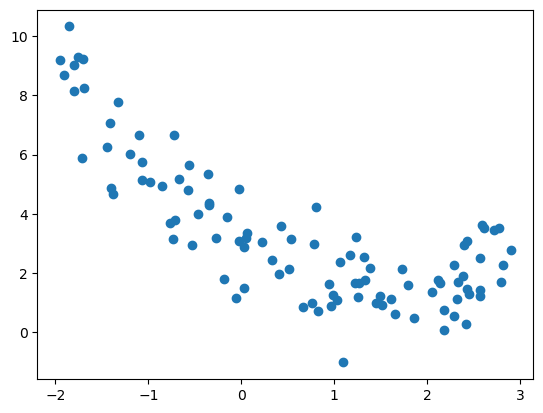

In [23]:
m = 100
x1 = 5*np.random.rand(m,1) - 2
x2 = 0.7 * (x1 ** 2) - (2 * x1) + 3 + np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

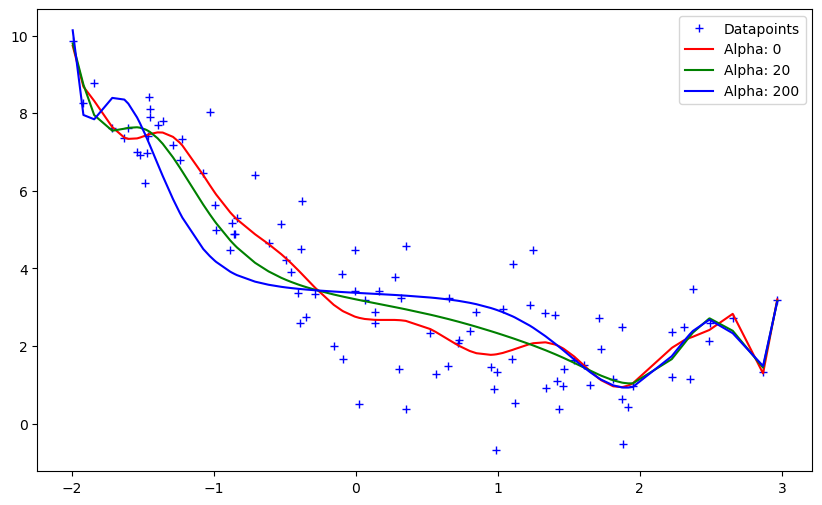

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()